In [1]:
from ema_workbench import (
    Model,
    Policy,
    ema_logging,
    SequentialEvaluator,
    MultiprocessingEvaluator
)
from dike_model_function import DikeNetwork  # @UnresolvedImport
from problem_formulation import get_model_for_problem_formulation, sum_over, sum_over_time

from ema_workbench import perform_experiments
from ema_workbench import Samplers
from ema_workbench.analysis import prim
from ema_workbench import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Create an instance of the model which is usable with the EMA workbench
dike_model, planning_steps = get_model_for_problem_formulation(3)

In [3]:
zero_policy = {"DaysToThreat": 0}
zero_policy.update({f"DikeIncrease {n}": 0 for n in planning_steps})
zero_policy.update({f"RfR {n}": 0 for n in planning_steps})

pol0 = {}

for key in dike_model.levers:
    s1, s2 = key.name.split("_")
    pol0.update({key.name: zero_policy[s2]})

policy0 = Policy("Policy 0", **pol0)

In [4]:
with SequentialEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios=40,policies=policy0,uncertainty_sampling=Samplers.LHS)

experiments, outcomes = results

[MainProcess/INFO] performing 40 scenarios * 1 policies * 1 model(s) = 40 experiments
100%|██████████████████████████████████████████| 40/40 [00:20<00:00,  1.94it/s]
[MainProcess/INFO] experiments finished


In [5]:
x = experiments.iloc[:, :19]
outcomes_array = outcomes['A.5_Expected Number of Deaths']
y = outcomes_array < np.percentile(outcomes_array, 10)

In [9]:
y = outcomes["A.5_Expected Number of Deaths"] <= list(np.sort(outcomes["A.5_Expected Number of Deaths"]))[int(0.20* len(outcomes["A.5_Expected Number of Deaths"]))]

In [11]:
k

0.0

[MainProcess/INFO] 40 points remaining, containing 31 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.7, coverage: 0.9032258064516129, density: 1.0 restricted_dimensions: 2


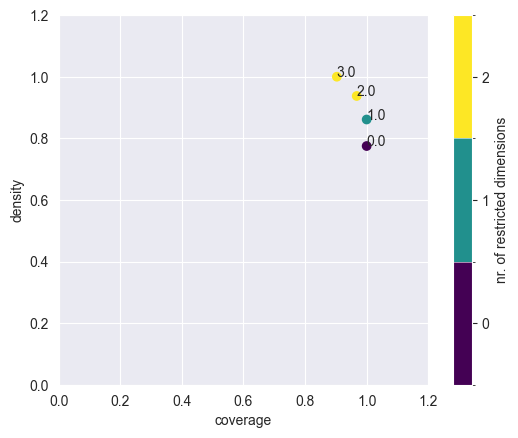

In [10]:
prim_alg = prim.Prim(x, y, threshold=0.8, peel_alpha=0.1)
box1 = prim_alg.find_box()
box1.show_tradeoff(annotated=True)
plt.show()